In [ ]:
#Sales Price Prediction Project 

#Prepared by Semih Birkan Keşab 

In [ ]:
#Please see the dataset that is explained below;

#Book Name: The title of each book.

#Author: The name of the author who wrote the book.

#language_code: The code representing the language in which the book is written.

#Author_Rating: The rating assigned to the author based on their previous works.

#Book_average_rating: The average rating given to the book by readers.

#Book_ratings_count: The number of ratings given to the book by readers.

#genre: The genre or category to which the book belongs.

#gross sales: The total sales revenue generated by each book.

#publisher revenue: The revenue earned by publishers from selling each book.

#sale price: The price at which each copy of a book is sold.

#sales rank: A numeric value indicating a book's rank based on its sales performance in comparison to other books within its category (genre).

#units sold : Total number of copies sold for each specific title.

#Dataset is available through kaggle.com 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

In [2]:
df = pd.read_csv('Books_Data.csv')

In [4]:
#Veri seti içeriği gösterildi, türleri incelendi

In [3]:
print(df.head())

   index  Publishing Year                        Book Name  \
0      0           1975.0                          Beowulf   
1      1           1987.0                 Batman: Year One   
2      2           2015.0                Go Set a Watchman   
3      3           2008.0  When You Are Engulfed in Flames   
4      4           2011.0         Daughter of Smoke & Bone   

                                              Author language_code  \
0                             Unknown, Seamus Heaney         en-US   
1  Frank Miller, David Mazzucchelli, Richmond Lew...           eng   
2                                         Harper Lee           eng   
3                                      David Sedaris         en-US   
4                                       Laini Taylor           eng   

  Author_Rating  Book_average_rating  Book_ratings_count          genre  \
0        Novice                 3.42              155903  genre fiction   
1  Intermediate                 4.23              145267

In [5]:
print(df.dtypes)

index                    int64
Publishing Year        float64
Book Name               object
Author                  object
language_code           object
Author_Rating           object
Book_average_rating    float64
Book_ratings_count       int64
genre                   object
gross sales            float64
publisher revenue      float64
sale price             float64
sales rank               int64
Publisher               object
units sold               int64
dtype: object


In [6]:
#Veri seti türleri düzenlendi

In [7]:
df['Publishing Year'] = pd.to_datetime(df['Publishing Year'], format='%Y', errors='coerce')
df['Book Name'] = df['Book Name'].astype(str)
df['Book_average_rating'] = df['Book_average_rating'].astype(int)
df['Book_ratings_count'] = df['Book_ratings_count'].astype(int)
df['gross sales'] = df['gross sales'].astype(int)
df['publisher revenue'] = df['publisher revenue'].astype(int)
df['sale price'] = df['sale price'].astype(int)
df['sales rank'] = df['sales rank'].astype(int)
df['units sold'] = df['units sold'].astype(int)

In [8]:
print(df.dtypes)

index                           int64
Publishing Year        datetime64[ns]
Book Name                      object
Author                         object
language_code                  object
Author_Rating                  object
Book_average_rating             int32
Book_ratings_count              int32
genre                          object
gross sales                     int32
publisher revenue               int32
sale price                      int32
sales rank                      int32
Publisher                      object
units sold                      int32
dtype: object


In [ ]:
print(df.info())

In [9]:
names=["index","Publishing Year","Book Name","Author","language_code","Author_Rating","Book_average_rating","Book_ratings_count","genre","gross sales","publisher revenue","sale price","sales rank","Publisher","units sold"]
df.columns = names
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975-01-01,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3,155903,genre fiction,34160,20496,4,1,HarperCollins Publishers,7000
1,1,1987-01-01,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4,145267,genre fiction,12437,7462,1,2,HarperCollins Publishers,6250
2,2,2015-01-01,Go Set a Watchman,Harper Lee,eng,Novice,3,138669,genre fiction,47795,28677,8,3,"Amazon Digital Services, Inc.",5500
3,3,2008-01-01,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4,150898,fiction,41250,24750,7,3,Hachette Book Group,5500
4,4,2011-01-01,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4,198283,genre fiction,37952,22771,7,4,Penguin Group (USA) LLC,4750


In [10]:
#Zaman index olarak belirlendi

In [11]:
df.set_index('Publishing Year', inplace=True)

In [12]:
#Veri setinde kayıp değerler için "?" atandı

In [13]:
col_names = df.columns
num_data = df.shape[0]
for c in col_names:
    num_non = df[c].isin([" ?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(int32(num_non) / num_data * 100), '\n')

In [17]:
#Veri setinde bulunan kayıp nümerik değerler için atama yapıldı ve tekrar eden değerler silindikten sonrası kontrol edildi

In [14]:
df = df.dropna(subset=['sale price', 'units sold','gross sales','Book_ratings_count','publisher revenue']).astype({'sale price': 'int32', 'units sold': 'int32','gross sales': 'int32','Book_ratings_count':'int32','publisher revenue':'int32'})

In [15]:
int32_columns = df.select_dtypes(include='int32').columns
df = df.drop_duplicates(subset=int32_columns)

In [16]:
print(df)

                 index                        Book Name  \
Publishing Year                                           
1975-01-01           0                          Beowulf   
1987-01-01           1                 Batman: Year One   
2015-01-01           2                Go Set a Watchman   
2008-01-01           3  When You Are Engulfed in Flames   
2011-01-01           4         Daughter of Smoke & Bone   
...                ...                              ...   
2014-01-01        1065                    Gray Mountain   
1989-01-01        1066                 The Power of One   
1930-01-01        1067               The Maltese Falcon   
2011-01-01        1068                       Night Road   
1999-01-01        1069                         Tripwire   

                                                            Author  \
Publishing Year                                                      
1975-01-01                                  Unknown, Seamus Heaney   
1987-01-01       Frank

In [18]:
#Sadece nümerik olan değerler incelendi ve histogram ve box plot grafikleri oluşturuldu

In [19]:
num_attributes = df.select_dtypes(include=['int32'])
print(num_attributes.columns)

Index(['Book_average_rating', 'Book_ratings_count', 'gross sales',
       'publisher revenue', 'sale price', 'sales rank', 'units sold'],
      dtype='object')


array([[<Axes: title={'center': 'Book_average_rating'}>,
        <Axes: title={'center': 'Book_ratings_count'}>,
        <Axes: title={'center': 'gross sales'}>],
       [<Axes: title={'center': 'publisher revenue'}>,
        <Axes: title={'center': 'sale price'}>,
        <Axes: title={'center': 'sales rank'}>],
       [<Axes: title={'center': 'units sold'}>, <Axes: >, <Axes: >]],
      dtype=object)

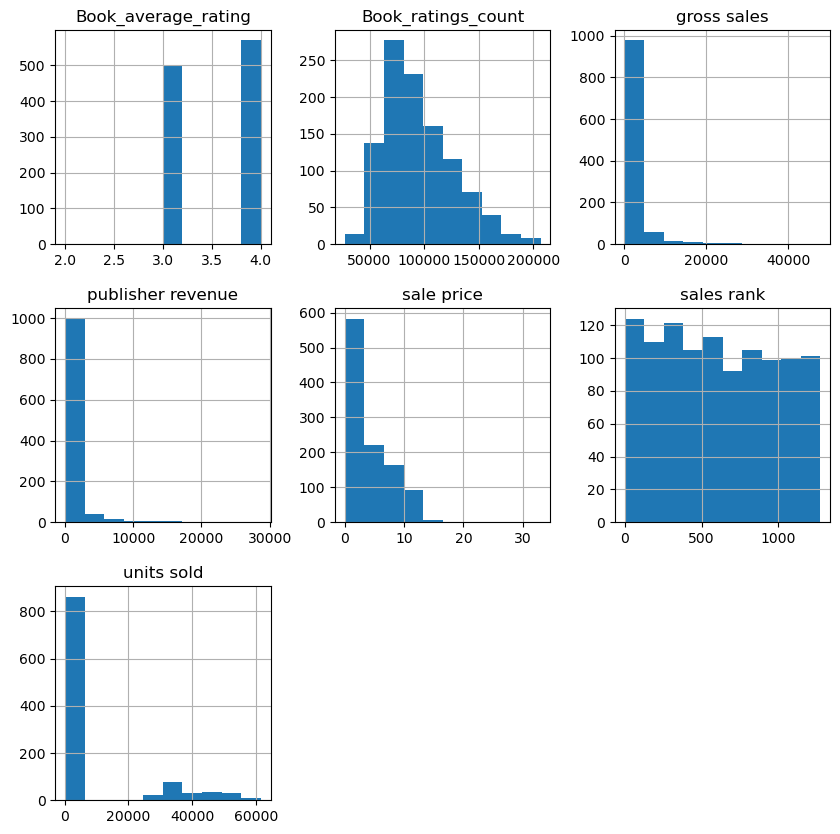

In [20]:
num_attributes.hist(figsize=(10,10))

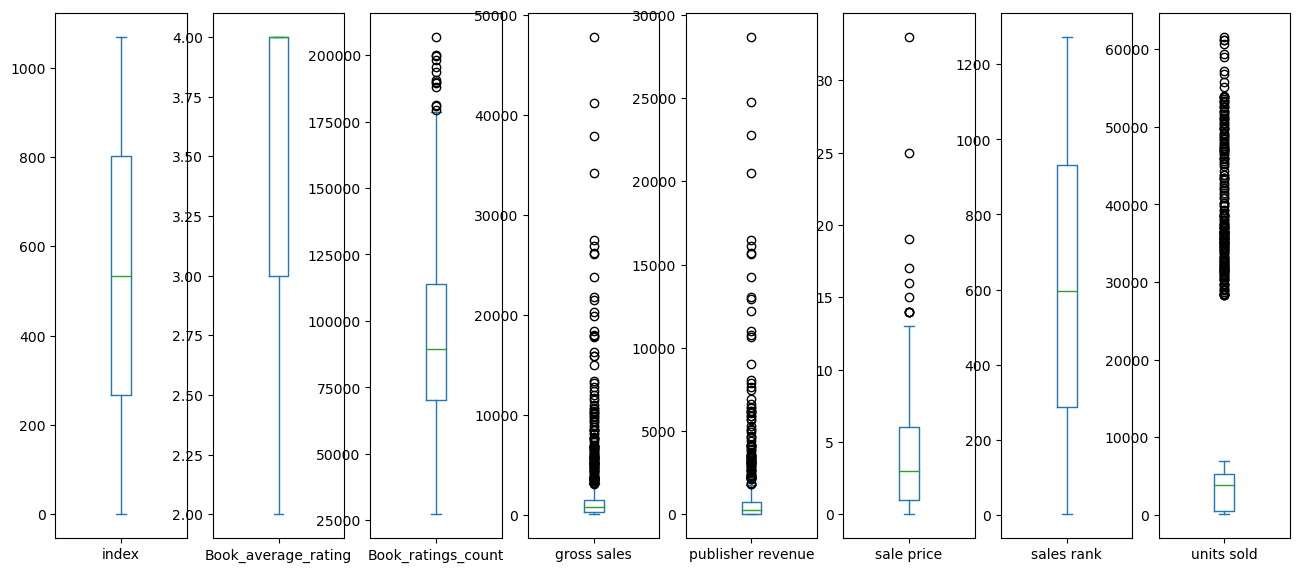

In [21]:
df.plot(kind='box', subplots=True, layout=(2,10), sharex=False, sharey=False,figsize=(20,15))
plt.show()

In [22]:
#Veri seti üzerindeki sola ve sağa yatık olan değerler için IQR Method uygulandı sonrasında box plot ile kontrol edildi

In [23]:
def handle_outliers_iqr_int(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    column = np.where((column < lower_bound) | (column > upper_bound), np.nan, column)
    
    return column

In [24]:
for column in df.columns:
    if np.issubdtype(df[column].dtype, np.integer):
        df[column] = handle_outliers_iqr_int(df[column])

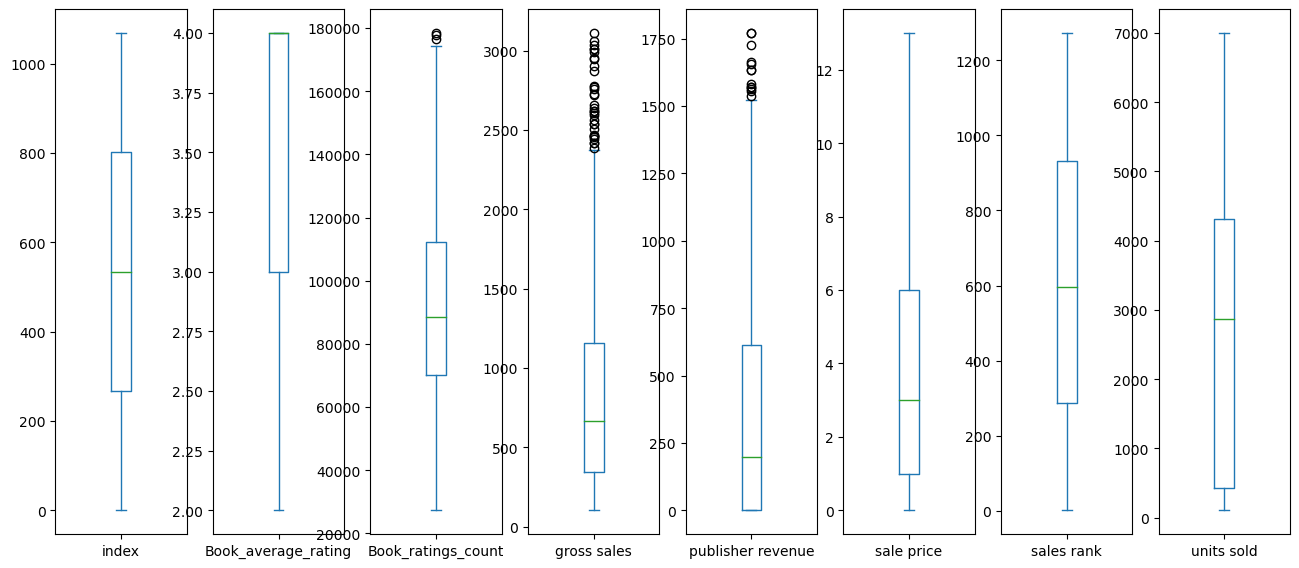

In [25]:
df.plot(kind='box', subplots=True, layout=(2,10), sharex=False, sharey=False,figsize=(20,15))
plt.show()

In [26]:
#Nümerik değerler için QQ Plot grafikleri incelendi

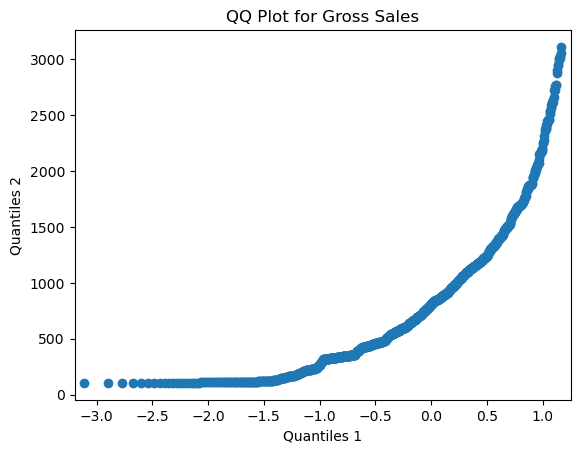

In [27]:
qqplot(df['gross sales'], line='s')
plt.title('QQ Plot for Gross Sales')
plt.xlabel('Quantiles 1')
plt.ylabel('Quantiles 2')
plt.show()

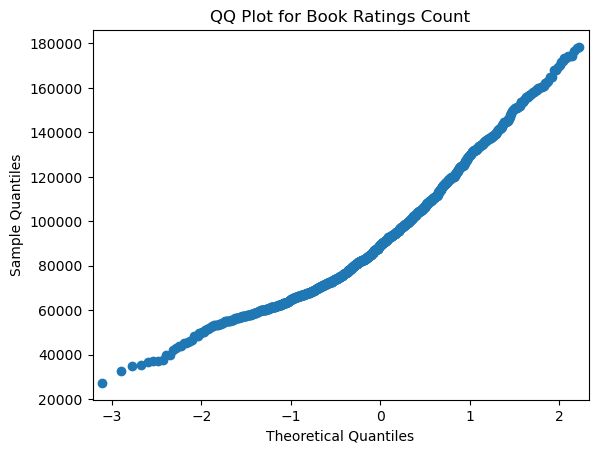

In [28]:
qqplot(df['Book_ratings_count'], line='s')
plt.title('QQ Plot for Book Ratings Count')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

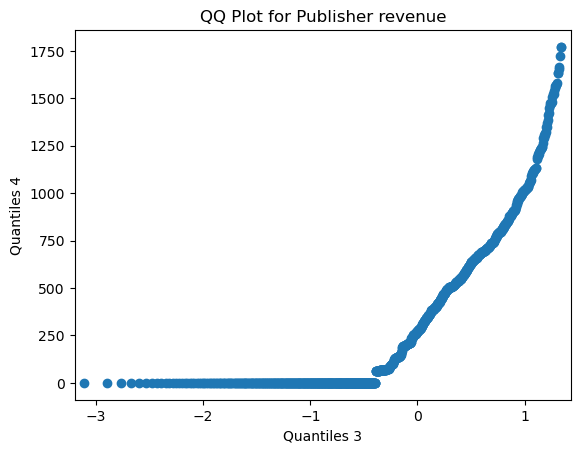

In [29]:
qqplot(df['publisher revenue'], line='s')
plt.title('QQ Plot for Publisher revenue')
plt.xlabel('Quantiles 3')
plt.ylabel('Quantiles 4')
plt.show()

In [30]:
#QQ plot grafiklerinde görünen eğri ve box plot grafiğindeki bulunan outlier kalan değerlerin normal dağılıma sahip olup olmadığına bakıldı

In [31]:
publisher_revenue = df['publisher revenue'].values

In [32]:
df['publisher revenue'].fillna(value=0, inplace=True)

In [33]:
shapiro(publisher_revenue)

ShapiroResult(statistic=0.7983306050300598, pvalue=1.8449528477062251e-34)

In [34]:
df['gross sales'].fillna(value=0, inplace=True)

In [35]:
gross_sales = df['gross sales'].values

In [36]:
shapiro(gross_sales)

ShapiroResult(statistic=0.896407425403595, pvalue=3.082704790595639e-26)

In [37]:
ratings_count = df['Book_ratings_count'].values

In [38]:
df['Book_ratings_count'].fillna(value=0, inplace=True)

In [39]:
shapiro(ratings_count)

ShapiroResult(statistic=0.971092164516449, pvalue=9.038122084515515e-14)

In [40]:
df.describe()

,index,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1060.000000,1070.000000,866.000000
mean,534.500000,3.530841,92579.188785,733.155140,316.123364,3.851887,611.652336,2491.456120
std,309.026698,0.501151,31339.786037,654.667482,398.111660,3.337733,369.849830,1983.018191
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,106.000000
25%,267.250000,3.000000,69601.000000,214.500000,0.000000,1.000000,287.500000,420.750000
50%,534.500000,4.000000,87573.500000,568.000000,112.500000,3.000000,595.500000,2862.000000
75%,801.750000,4.000000,111625.500000,1097.750000,558.000000,6.000000,932.500000,4320.000000
max,1069.000000,4.000000,178432.000000,3112.000000,1771.000000,13.000000,1273.000000,7000.000000


In [41]:
#Veri setine ait kayıp değer her bir kolon için incelendi, nümerik değerler için "0" atandı

In [42]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 index                    0
Book Name                0
Author                   0
language_code           53
Author_Rating            0
Book_average_rating      0
Book_ratings_count       0
genre                    0
gross sales              0
publisher revenue        0
sale price              10
sales rank               0
Publisher                0
units sold             204
dtype: int64


In [43]:
df['units sold'].fillna(value=0, inplace=True)

In [44]:
df['sale price'].fillna(value=0, inplace=True)

In [45]:
#Kategorik verilere ait kolonlar incelenip kayıp değerler silindi

In [46]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 index                   0
Book Name               0
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64


In [47]:
df = df.dropna(subset=['language_code'])

In [48]:
print("\nDataFrame after removing rows with missing values in 'Language Code' column:")
print(df)


DataFrame after removing rows with missing values in 'Language Code' column:
                  index                        Book Name  \
Publishing Year                                            
1975-01-01          0.0                          Beowulf   
1987-01-01          1.0                 Batman: Year One   
2015-01-01          2.0                Go Set a Watchman   
2008-01-01          3.0  When You Are Engulfed in Flames   
2011-01-01          4.0         Daughter of Smoke & Bone   
...                 ...                              ...   
2014-01-01       1065.0                    Gray Mountain   
1989-01-01       1066.0                 The Power of One   
1930-01-01       1067.0               The Maltese Falcon   
2011-01-01       1068.0                       Night Road   
1999-01-01       1069.0                         Tripwire   

                                                            Author  \
Publishing Year                                                      
1

In [49]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 index                  0
Book Name              0
Author                 0
language_code          0
Author_Rating          0
Book_average_rating    0
Book_ratings_count     0
genre                  0
gross sales            0
publisher revenue      0
sale price             0
sales rank             0
Publisher              0
units sold             0
dtype: int64


In [50]:
print("Number of unique values in each column:\n", df.nunique())

Number of unique values in each column:
 index                  1017
Book Name               997
Author                  709
language_code             8
Author_Rating             4
Book_average_rating       3
Book_ratings_count      999
genre                     4
gross sales             591
publisher revenue       413
sale price               14
sales rank              830
Publisher                 9
units sold              376
dtype: int64


In [51]:
print("Correlation matrix:\n", df.corr())

Correlation matrix:
                         index  Book_average_rating  Book_ratings_count  \
index                1.000000            -0.019367           -0.722701   
Book_average_rating -0.019367             1.000000            0.038585   
Book_ratings_count  -0.722701             0.038585            1.000000   
gross sales         -0.151992             0.036982            0.117777   
publisher revenue   -0.024893             0.030099            0.021446   
sale price           0.087538             0.036288           -0.086703   
sales rank           0.999474            -0.019276           -0.719595   
units sold           0.058322             0.029055           -0.125539   

                     gross sales  publisher revenue  sale price  sales rank  \
index                  -0.151992          -0.024893    0.087538    0.999474   
Book_average_rating     0.036982           0.030099    0.036288   -0.019276   
Book_ratings_count      0.117777           0.021446   -0.086703   -0.719595

C:\Users\Administrator\AppData\Local\Temp\ipykernel_84\4273230581.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Correlation matrix:\n", df.corr())


In [53]:
#Kategorik değerlere ait kayıp satırlar kontrol edildi, silindi 

In [52]:
cat_attributes = df.select_dtypes(include=['object'])
print(cat_attributes.columns)

Index(['Book Name', 'Author', 'language_code', 'Author_Rating', 'genre',
       'Publisher'],
      dtype='object')


In [54]:
print("Frequency distribution of a categorical variable:\n", df['Book Name'].value_counts())

Frequency distribution of a categorical variable:
 nan                                                                         19
Persepolis                                                                   2
The Awakening                                                                2
Haunted: A Novel of Stories                                                  1
Killing Lincoln: The Shocking Assassination that Changed America Forever     1
                                                                            ..
The Girl with All the Gifts                                                  1
As I Lay Dying                                                               1
Harold and the Purple Crayon                                                 1
Lover Eternal (Black Dagger Brotherhood, #2)                                 1
Tripwire                                                                     1
Name: Book Name, Length: 997, dtype: int64


In [55]:
df = df[df['Book Name'] != 'é‹¼ã®éŒ¬é‡‘è¡“å¸« 1']

In [56]:
df = df[df['Book Name'] != 'nan']

In [57]:
print("Frequency distribution of a categorical variable:\n", df['Book Name'].value_counts())

Frequency distribution of a categorical variable:
 Persepolis                                      2
The Awakening                                   2
The Shell Seekers                               1
The Ruins of Gorlan                             1
The Lowland                                     1
                                               ..
The Girl with All the Gifts                     1
As I Lay Dying                                  1
Harold and the Purple Crayon                    1
Lover Eternal (Black Dagger Brotherhood, #2)    1
Tripwire                                        1
Name: Book Name, Length: 995, dtype: int64


In [58]:
print(df['Book Name'].describe())

count            997
unique           995
top       Persepolis
freq               2
Name: Book Name, dtype: object


In [59]:
print(df['language_code'].describe())

count     997
unique      8
top       eng
freq      724
Name: language_code, dtype: object


In [60]:
print(df['Author'].describe())

count              997
unique             697
top       Stephen King
freq                27
Name: Author, dtype: object


In [61]:
print(df['genre'].describe())

count               997
unique                4
top       genre fiction
freq                771
Name: genre, dtype: object


In [ ]:
#Kategorik değerlerin grafikleri oluşturuldu ve dağılımları incelendi, accuracy için tanım düzenlendi

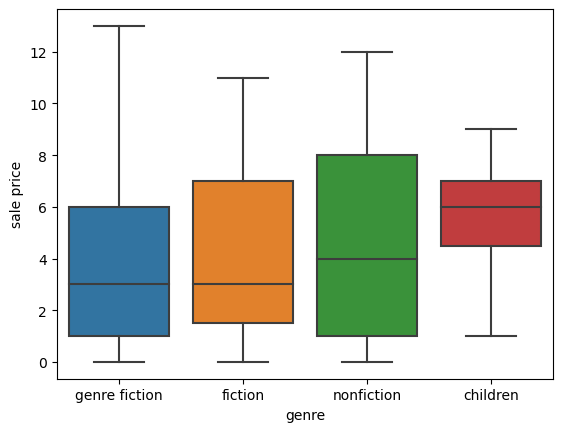

In [62]:
sns.boxplot(x='genre', y='sale price', data=df)
plt.show()

In [63]:
df['genre'] = df['genre'].str.replace('genre fiction','fiction')

In [64]:
print(df['genre'].describe())

count         997
unique          3
top       fiction
freq          826
Name: genre, dtype: object


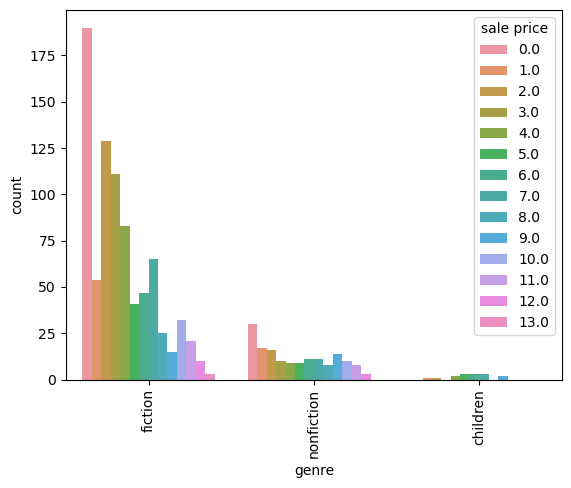

In [69]:
sns.countplot(x='genre', hue='sale price', data=df)
plt.xticks(rotation=90) 
plt.show()

In [70]:
#Kitap türlerine bakıldığında kurgu türüne ait olan kitapların adetlerinin ve fiyatlarının diğer iki türe kıyasla daha fazla olduğu gözlemleniyor

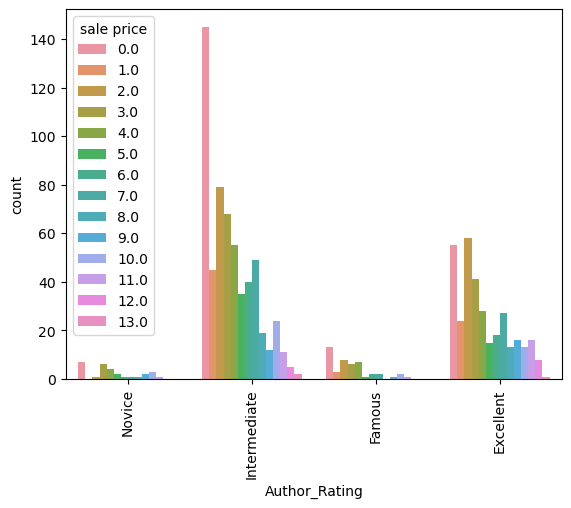

In [71]:
sns.countplot(x='Author_Rating', hue='sale price', data=df)
plt.xticks(rotation=90) 
plt.show()

In [74]:
#Yazar değerlendirmesinin orta seviye grubuna dahil olanların yüksek fiyata ve adete sahip olabildiğini gözlemleniyor

#Yazar değerlendirmesinin en mükemmel gruba dahil olanların ise acemi ve ünlü gruplarına kıyasla yüksek fiyata ve adete sahip olduğu gözlemleniyor

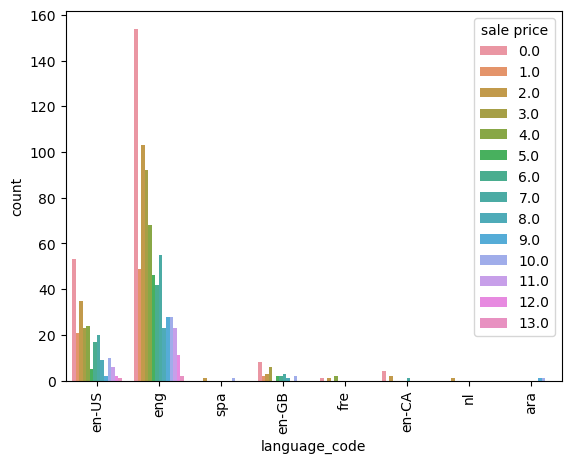

In [73]:
sns.countplot(x='language_code', hue='sale price', data=df)
plt.xticks(rotation=90) 
plt.show()

In [75]:
#Sadece ingilizce diline sahip olan kitapların fiyatlarının ve adetlerinin diğer dillere kıyasla yüksek olduğu gözlemlendi

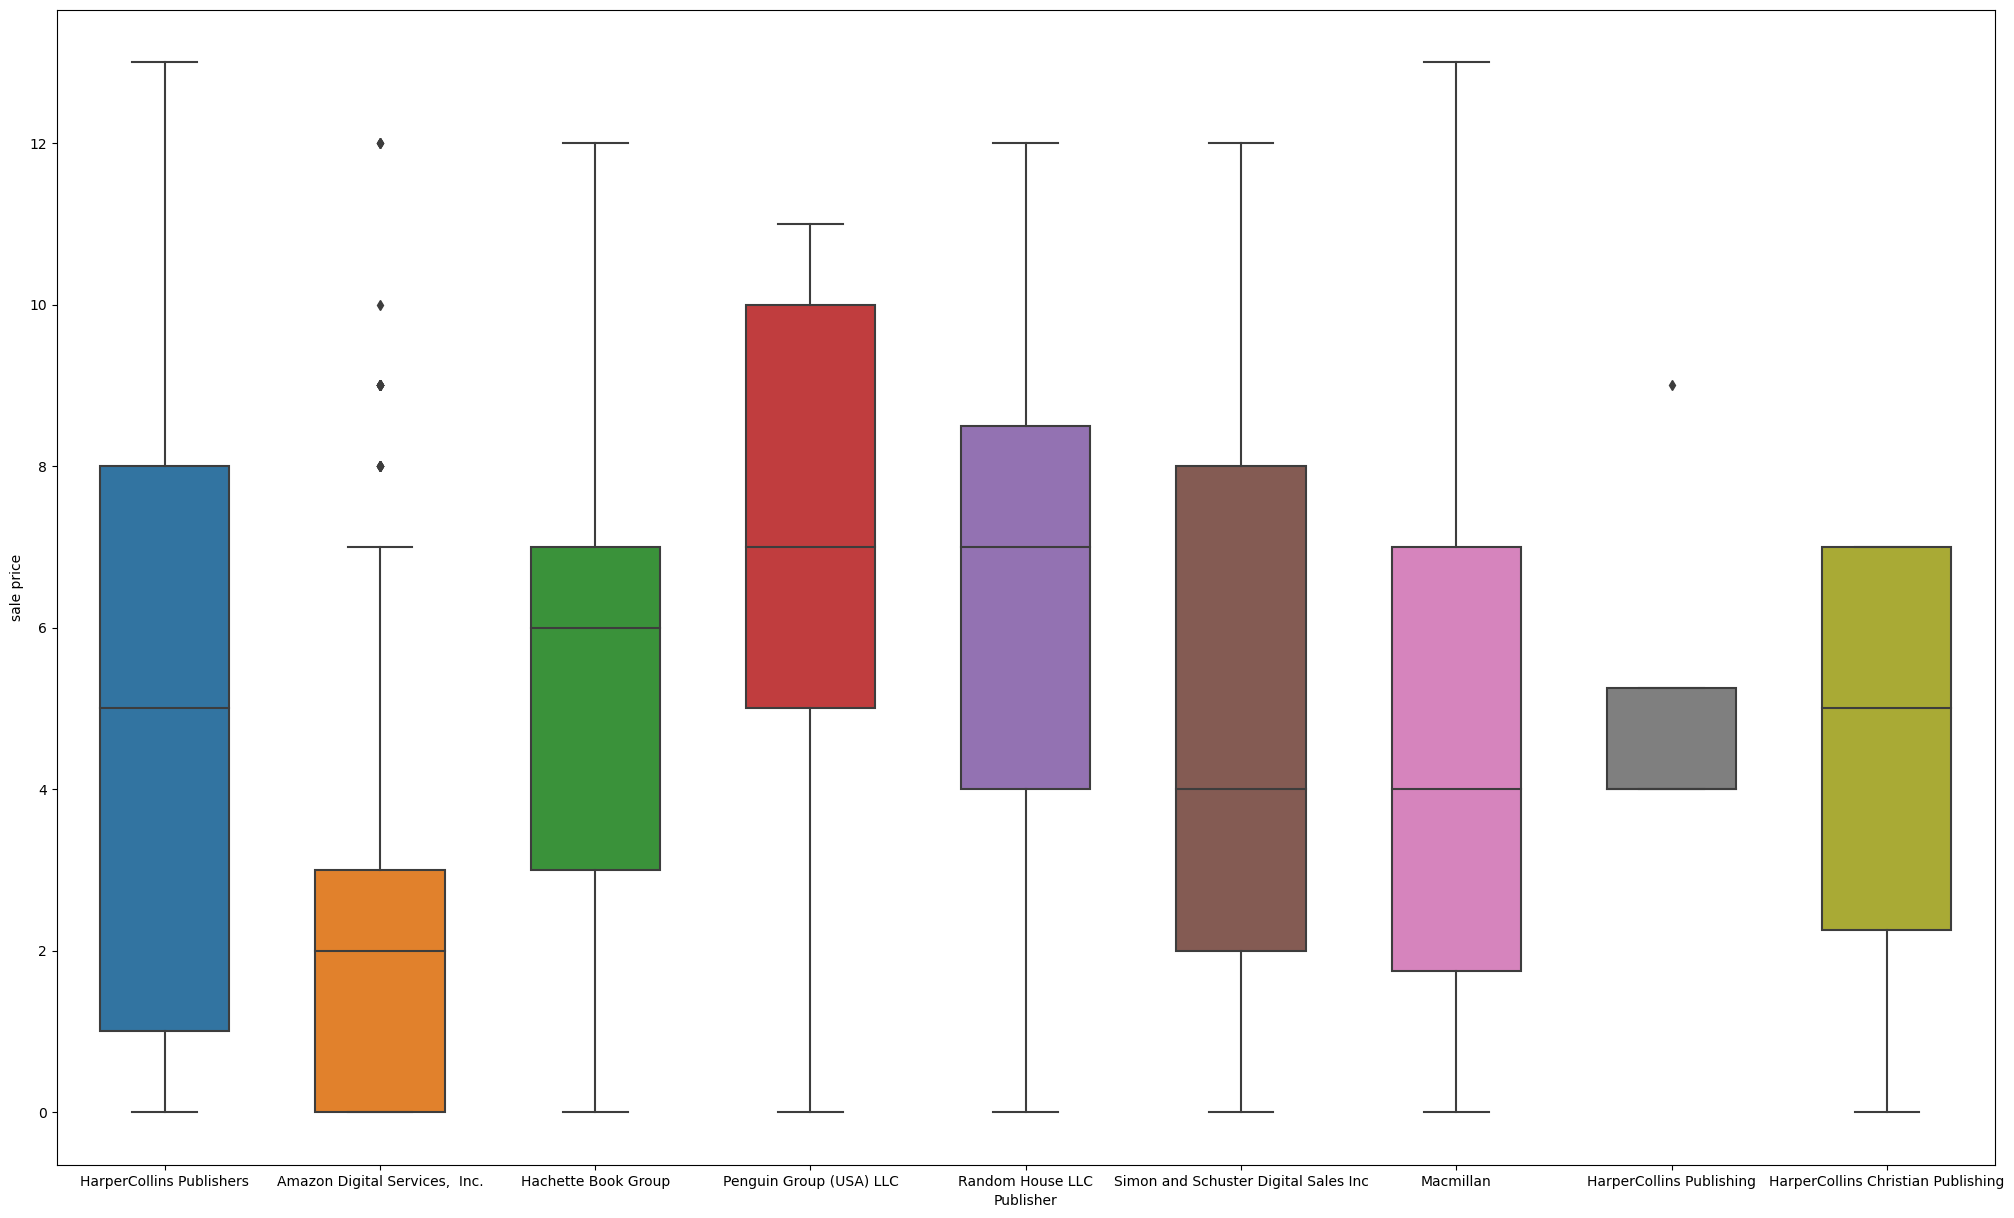

In [77]:
plt.figure(figsize=(25, 15))
sns.boxplot(x='Publisher', y='sale price', data=df, width=0.6, dodge=True)
plt.show()

In [79]:
#Yukarıda bulunan yayımcı box plot ve aşağıda bulunan count plot yayımcılara göre fiyatın değişkenliği ile adeti belirtmektedir
#Aşağıda bulunan Amazon Dijital Servisi yayımcısına ait kitap adeti diğer yayımcılara göre daha fazladır
#Yukarıda bulunan HarperCollins Publishers ve Macmillan yayımcılarında ise diğer yayımcılara göre en yüksek fiyatta kitap bulunmaktadır

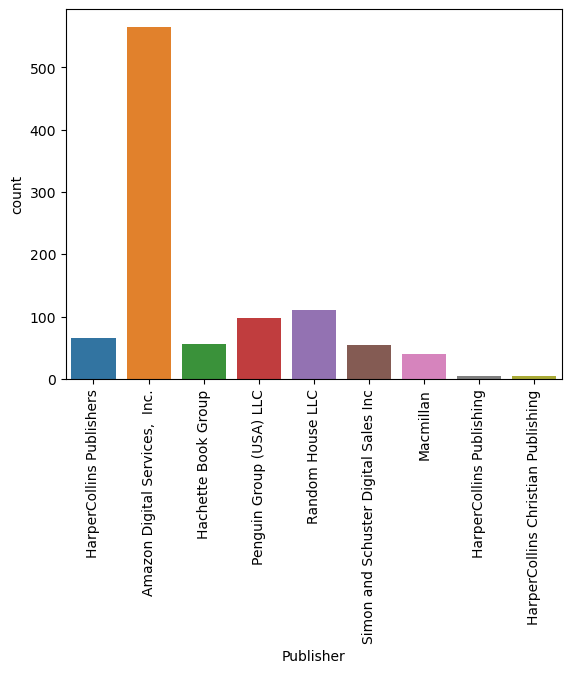

In [78]:
sns.countplot(x='Publisher', data=df)
plt.xticks(rotation=90) 
plt.show()

In [80]:
#Model öncesi nümerik değişkenler normalize edildi ve birbirleri ile korelasyonlarına bakıldı. Kategorik değişkenler Lojistik regresyon ve SVM için dummy değişkenlere, Random Forest ve MultiOutput için numerik değerlere dönüştürüldü

In [81]:
num_attributes.head()

,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
Publishing Year,,,,,,,
1975-01-01,3,155903,34160,20496,4,1,7000
1987-01-01,4,145267,12437,7462,1,2,6250
2015-01-01,3,138669,47795,28677,8,3,5500
2008-01-01,4,150898,41250,24750,7,3,5500
2011-01-01,4,198283,37952,22771,7,4,4750


In [82]:
from pandas.plotting import scatter_matrix

import sklearn

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [85]:
#Bağımlı değişken 'Sale price' olarak tanımlandı

In [83]:
target = df['sale price']
features_data = df.drop('sale price', axis=1)

numeric_features = [column_name for column_name in features_data
                    if features_data[column_name].dtype.kind in ('i', 'f')]

min_max_scaler = preprocessing.MinMaxScaler()
df[numeric_features] = min_max_scaler.fit_transform(df[numeric_features])
df[numeric_features].head()

,index,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sales rank,units sold
Publishing Year,,,,,,,
1975-01-01,0.000000,0.5,0.873739,0.0,0.0,0.000000,1.000000
1987-01-01,0.000935,1.0,0.814131,0.0,0.0,0.000786,0.892857
2015-01-01,0.001871,0.5,0.777153,0.0,0.0,0.001572,0.785714
2008-01-01,0.002806,1.0,0.845689,0.0,0.0,0.001572,0.785714
2011-01-01,0.003742,1.0,0.000000,0.0,0.0,0.002358,0.678571


In [ ]:
#Model öncesi nümerik değişkenler normalize edildi ve birbirleri ile korelasyonlarına bakıldı. Kategorik değişkenler Lojistik regresyon ve SVM için dummy değişkenlere, Random Forest Regressor ve MultiOutput için numerik değerlere dönüştürüldü.

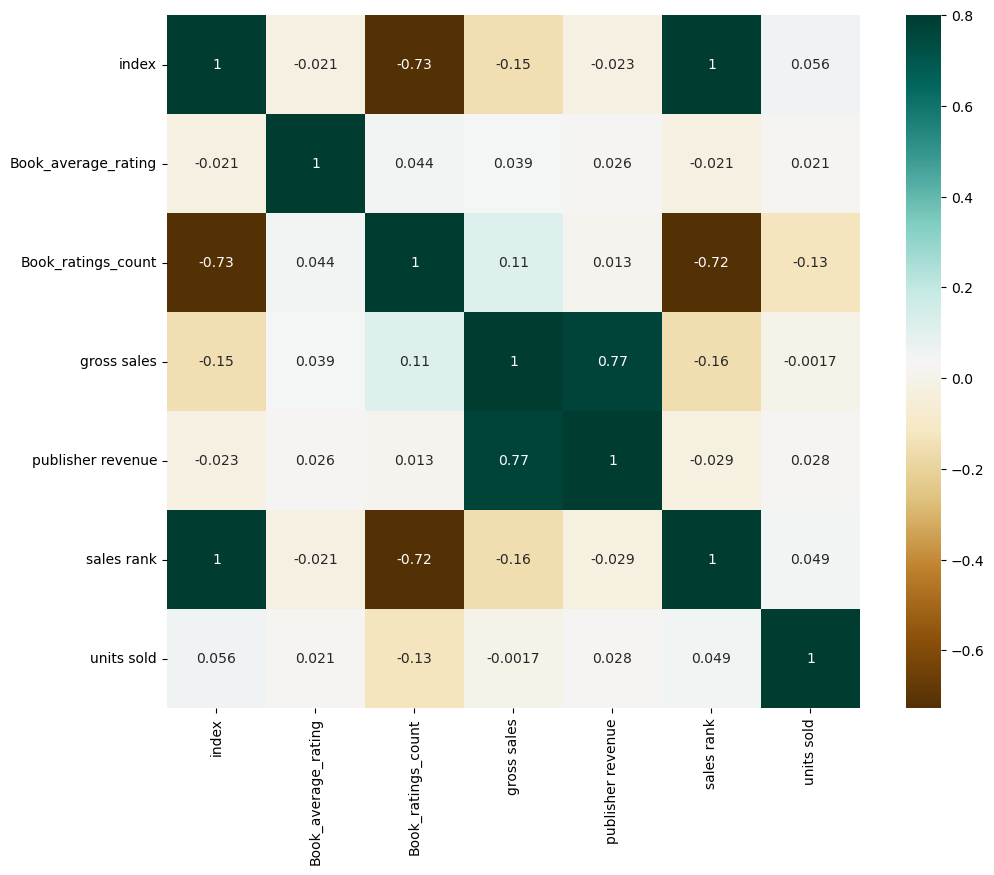

In [84]:
hmap = df[numeric_features].corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

In [86]:
#Korelasyon matrisi incelendiğinde;en yüksek korelasyonların publisher revenue ile gross sales (r:0,77) ve Book_ratings_count ile sales rank (r:0,72) arasında olduğu görülüyor.

In [87]:
#dummy dönüşüm
categorical_data = df.drop(numeric_features, 1)
categorical_data = categorical_data.drop('sale price',1)
categorical_data_dummy =pd.get_dummies(categorical_data, drop_first=True)
categorical_data_dummy.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_84\2076893112.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  categorical_data = df.drop(numeric_features, 1)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_84\2076893112.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  categorical_data = categorical_data.drop('sale price',1)


,Book Name_ Animal Farm & 1984,Book Name_ The Tale of Despereaux,Book Name_'Salem's Lot The Illustrated Edition,Book Name_1776,Book Name_2nd Chance,Book Name_A Beautiful Mind,Book Name_A Bend in the Road,Book Name_A Breath of Snow and Ashes,Book Name_A Bruxa de Portobello,Book Name_A Canticle for Leibowitz,...,genre_fiction,genre_nonfiction,Publisher_Hachette Book Group,Publisher_HarperCollins Christian Publishing,Publisher_HarperCollins Publishers,Publisher_HarperCollins Publishing,Publisher_Macmillan,Publisher_Penguin Group (USA) LLC,Publisher_Random House LLC,Publisher_Simon and Schuster Digital Sales Inc
Publishing Year,,,,,,,,,,,,,,,,,,,,,
1975-01-01,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1987-01-01,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2015-01-01,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2008-01-01,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2011-01-01,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [88]:
categorical_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 997 entries, 1975-01-01 to 1999-01-01
Columns: 1710 entries, Book Name_ Animal Farm & 1984 to Publisher_Simon and Schuster Digital Sales Inc
dtypes: uint8(1710)
memory usage: 1.6 MB


In [89]:
numeric_data=df[numeric_features]
new_df = pd.concat([numeric_data, categorical_data_dummy,target], axis=1)
new_df.head()

,index,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sales rank,units sold,Book Name_ Animal Farm & 1984,Book Name_ The Tale of Despereaux,Book Name_'Salem's Lot The Illustrated Edition,...,genre_nonfiction,Publisher_Hachette Book Group,Publisher_HarperCollins Christian Publishing,Publisher_HarperCollins Publishers,Publisher_HarperCollins Publishing,Publisher_Macmillan,Publisher_Penguin Group (USA) LLC,Publisher_Random House LLC,Publisher_Simon and Schuster Digital Sales Inc,sale price
Publishing Year,,,,,,,,,,,,,,,,,,,,,
1975-01-01,0.000000,0.5,0.873739,0.0,0.0,0.000000,1.000000,0,0,0,...,0,0,0,1,0,0,0,0,0,4.0
1987-01-01,0.000935,1.0,0.814131,0.0,0.0,0.000786,0.892857,0,0,0,...,0,0,0,1,0,0,0,0,0,1.0
2015-01-01,0.001871,0.5,0.777153,0.0,0.0,0.001572,0.785714,0,0,0,...,0,0,0,0,0,0,0,0,0,8.0
2008-01-01,0.002806,1.0,0.845689,0.0,0.0,0.001572,0.785714,0,0,0,...,0,1,0,0,0,0,0,0,0,7.0
2011-01-01,0.003742,1.0,0.000000,0.0,0.0,0.002358,0.678571,0,0,0,...,0,0,0,0,0,0,1,0,0,7.0


In [90]:
#kategorik değerlerin nümerik dönüşümü
categorical_data_encoded = categorical_data.apply(lambda x: pd.factorize(x)[0])
df_oth=pd.concat([numeric_data, categorical_data_encoded,target], axis=1)
df_oth.head()

,index,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sales rank,units sold,Book Name,Author,language_code,Author_Rating,genre,Publisher,sale price
Publishing Year,,,,,,,,,,,,,,
1975-01-01,0.000000,0.5,0.873739,0.0,0.0,0.000000,1.000000,0,0,0,0,0,0,4.0
1987-01-01,0.000935,1.0,0.814131,0.0,0.0,0.000786,0.892857,1,1,1,1,0,0,1.0
2015-01-01,0.001871,0.5,0.777153,0.0,0.0,0.001572,0.785714,2,2,1,0,0,1,8.0
2008-01-01,0.002806,1.0,0.845689,0.0,0.0,0.001572,0.785714,3,3,0,1,0,2,7.0
2011-01-01,0.003742,1.0,0.000000,0.0,0.0,0.002358,0.678571,4,4,1,1,0,3,7.0


In [91]:
#Bağımlı ve bağımsız değişkenleri tanımlayıp eğitim-test veri setlerini oluşturuldu

In [147]:
#new_df_vars,X  created for LR, SVM
#df_oth_vars, X_oth created Random Forest, MultiOutput
new_df_vars=new_df.columns.values.tolist()
y=['sale price']
X=[i for i in new_df_vars if i != y]
df_oth_vars=df_oth.columns.values.tolist()
X_oth=[i for i in df_oth_vars if i != y]

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df[X], new_df[y], test_size=0.2, random_state=0)
X_train_oth, X_test_oth, y_train_oth, y_test_oth = train_test_split(df_oth[X_oth], df_oth[y], test_size=0.2, random_state=0)

In [149]:
#Modellerin kütüphanesi kuruldu, modeller oluşturuldu, score sonuçları ortaya çıkarıldı

In [150]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [151]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [152]:
model.fit(X_train_oth, y_train_oth)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [153]:
y_pred = model.predict(X_test_oth)

In [154]:
mse = mean_squared_error(y_test_oth, y_pred)
r2 = r2_score(y_test_oth, y_pred)
mae = mean_absolute_error(y_test_oth, y_pred)

In [155]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"MAE: {mae}")

Mean Squared Error: 0.002605499999999997
R-squared: 0.9997562105263158
MAE: 0.005249999999999994


In [156]:
from sklearn.multioutput import MultiOutputRegressor

In [157]:
mdl = MultiOutputRegressor(RandomForestRegressor())

In [158]:
mdl.fit(X_train_oth, y_train_oth)

MultiOutputRegressor(estimator=RandomForestRegressor())

In [159]:
predictions = model.predict(X_test_oth)

In [160]:
mse_1 = mean_squared_error(y_test_oth, predictions)
mae_1 = mean_absolute_error(y_test_oth, predictions)
r2_1 = r2_score(y_test_oth, predictions)

In [161]:
print(f"R-squared: {r2_1}")
print(f"Mean Squared Error: {mse_1}")
print(f"MAE: {mae_1}")

R-squared: 0.9997562105263158
Mean Squared Error: 0.002605499999999997
MAE: 0.005249999999999994


In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [163]:
logreg = LogisticRegression()

In [164]:
logreg.fit(X_train, y_train)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [165]:
y_pred_1 = logreg.predict(X_test)

In [166]:
accuracy = accuracy_score(y_test, y_pred_1)
conf_matrix = confusion_matrix(y_test, y_pred_1)
classification_rep = classification_report(y_test, y_pred_1)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [167]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.74
Confusion Matrix:
[[50  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 33  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 19  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  7  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  4  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  3  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4 14  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  4  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  1  1  6  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       0.86      0.50      0.63        12
         2.0       0.85      0.97      0.90        34
         3.0       0.66      0.90      0.76        21
         4.0       0.58      0.39      0.4

In [168]:
from sklearn.svm import SVC

In [169]:
svm_model = SVC(kernel='linear', C=1.0)

In [170]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [171]:
y_pred_2 = svm_model.predict(X_test)

In [172]:
accuracy_1 = accuracy_score(y_test, y_pred_2)
conf_matrix_1 = confusion_matrix(y_test, y_pred_2)
classification_rep_1 = classification_report(y_test, y_pred_2)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.74
Confusion Matrix:
[[50  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 33  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 19  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  7  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  4  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  3  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4 14  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  4  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  1  1  6  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       0.86      0.50      0.63        12
         2.0       0.85      0.97      0.90        34
         3.0       0.66      0.90      0.76        21
         4.0       0.58      0.39      0.4